<a href="https://colab.research.google.com/github/MDRobiulhassan/Spam-Email-Detection/blob/main/SpamEmailDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import nltk

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIL Project Colab/Final Project 2/spam_and_ham_classification.csv')

In [ ]:
df.head()

,label,text
0,ham,into the kingdom of god and those that are ent...
1,spam,there was flow at hpl meter 1505 on april firs...
2,ham,take a look at this one campaign for bvyhprice...
3,spam,somu wrote actually thats what i was looking f...
4,spam,fathi boudra wrote i fixed the issue in the sv...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   9989 non-null   object
 1   text    9989 non-null   object
dtypes: object(2)
memory usage: 156.2+ KB


# Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['label'] = encoder.fit_transform(df['label'])

In [ ]:
#null
df.isnull().sum()

,0
label,0
text,0


In [ ]:
df=df.dropna()

In [ ]:
#Duplicate
df.duplicated().sum()

0

In [ ]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
df.shape

(9989, 2)

In [ ]:
df['label'].value_counts()

,count
label,
0,5294
1,4695


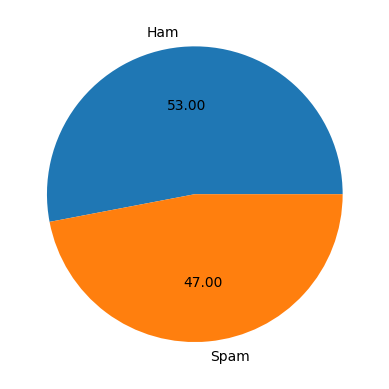

In [ ]:
plt.pie(df['label'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')
plt.show()

In [ ]:
df['length']=df['text'].apply(len)

In [ ]:
df.head()

,label,text,length
0,0,into the kingdom of god and those that are ent...,1054
1,1,there was flow at hpl meter 1505 on april firs...,235
2,0,take a look at this one campaign for bvyhprice...,218
3,1,somu wrote actually thats what i was looking f...,847
4,1,fathi boudra wrote i fixed the issue in the sv...,549


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df['word_count']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,label,text,length,word_count
0,0,into the kingdom of god and those that are ent...,1054,183
1,1,there was flow at hpl meter 1505 on april firs...,235,56
2,0,take a look at this one campaign for bvyhprice...,218,30
3,1,somu wrote actually thats what i was looking f...,847,166
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84


In [ ]:
df['sentence_count']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head(100)

,label,text,length,word_count,sentence_count
0,0,into the kingdom of god and those that are ent...,1054,183,1
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9
2,0,take a look at this one campaign for bvyhprice...,218,30,1
3,1,somu wrote actually thats what i was looking f...,847,166,1
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1
...,...,...,...,...,...
95,0,"sun , 19 dec 2004 22 : 45 : 30 - 0600\nbefore ...",2342,457,28
96,0,lady stalking grimly away on the arm of a rosy...,3160,556,1
97,1,andrew i'm very happy with the progress i've m...,380,77,1
98,1,"hi norma ,\nsevil ' s primary project has been...",448,83,5


In [ ]:
df[['length','word_count','sentence_count']].describe()

,length,word_count,sentence_count
count,9989.000000,9989.000000,9989.000000
mean,1622.113525,277.279708,7.021123
std,3329.436295,582.884890,26.366359
min,4.000000,1.000000,1.000000
25%,443.000000,79.000000,1.000000
50%,859.000000,150.000000,1.000000
75%,1864.000000,312.000000,5.000000
max,141261.000000,24945.000000,988.000000


In [ ]:
df[df['label']==0][['length','word_count','sentence_count']].describe()

,length,word_count,sentence_count
count,5294.000000,5294.000000,5294.000000
mean,1280.679071,215.684360,6.518700
std,2687.793425,471.502756,20.757494
min,4.000000,1.000000,1.000000
25%,352.000000,60.000000,1.000000
50%,678.000000,117.000000,1.000000
75%,1479.500000,246.000000,4.000000
max,141261.000000,24945.000000,502.000000


In [ ]:
df[df['label']==1][['length','word_count','sentence_count']].describe()

,length,word_count,sentence_count
count,4695.000000,4695.000000,4695.000000
mean,2007.109052,346.733546,7.587646
std,3893.761448,680.551094,31.508210
min,4.000000,1.000000,1.000000
25%,576.000000,108.000000,1.000000
50%,1114.000000,197.000000,1.000000
75%,2159.000000,379.000000,6.000000
max,85490.000000,16876.000000,988.000000


In [ ]:
import seaborn as sns

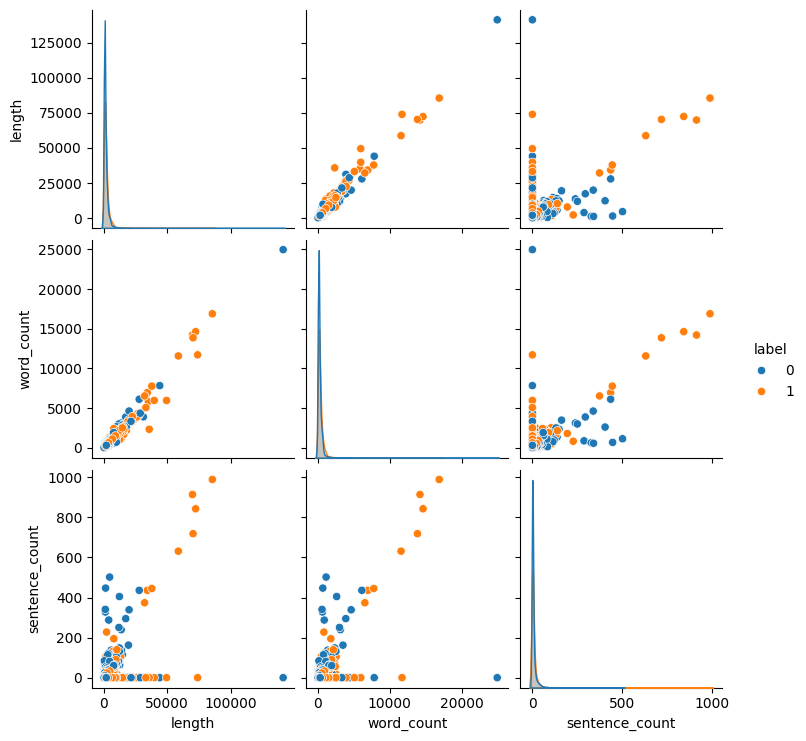

In [ ]:
sns.pairplot(df,hue='label')

<Axes: >

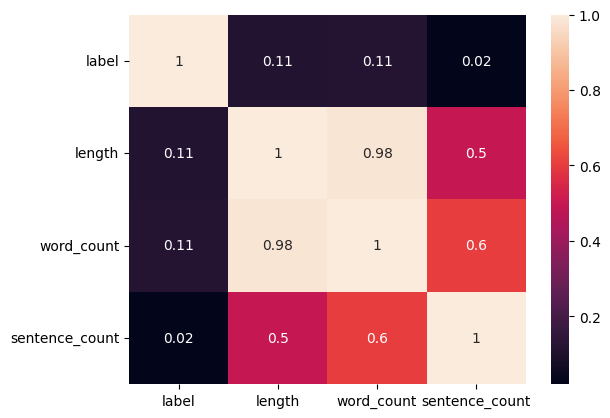

In [ ]:
numeric_df = df.select_dtypes(include=[float, int])
sns.heatmap(numeric_df.corr(), annot=True)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [ ]:
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

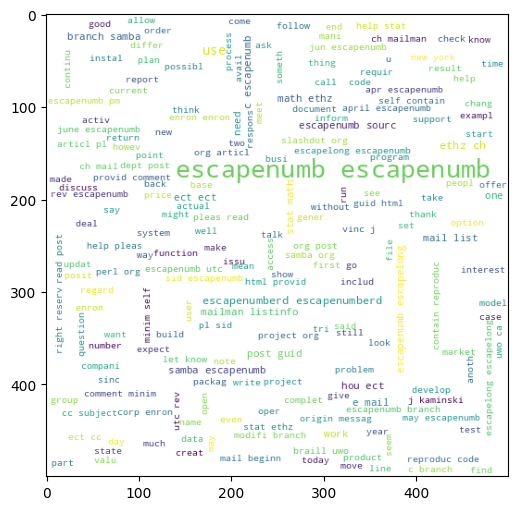

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

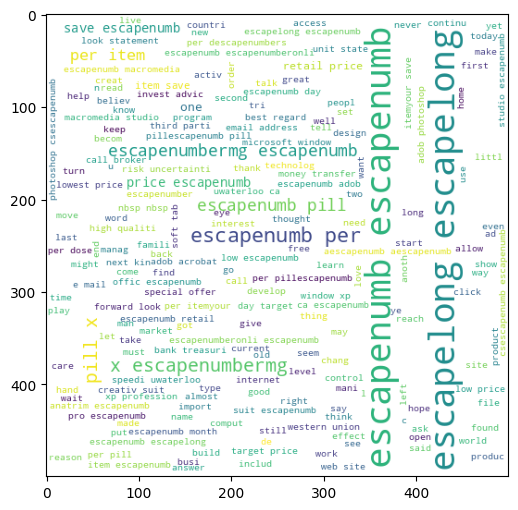

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...


In [ ]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)


1010080

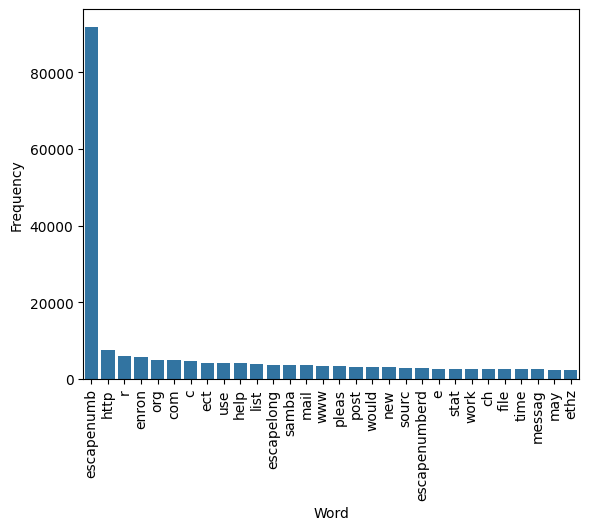

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

677739

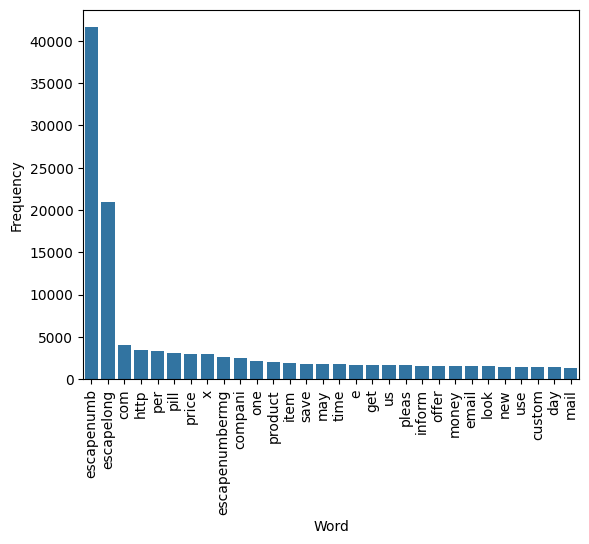

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...


In [ ]:
df['processed_length'] = df['transformed_text'].apply(len)

In [ ]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text,processed_length
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon escapenumb us th...,619
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...,106
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric escapenumb esc...,172
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...,535
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev escap...,440


In [ ]:
first_row = df.iloc[0]
print("Original Text:\n", first_row['text'])
print("\nTransformed Text:\n", first_row['transformed_text'])


Original Text:
 into the kingdom of god and those that are entering in he lord pardon escapenumber us in this thing we pray thee have us excused escapenumbernot therefore o escapenumber believers to look into the grave for to you it the holy ghost and escapenumber therefore being a holy habitation unto forth the words of truth and escapenumber soberness escapenumber but in all probability hath made them mad escapenumber and though escapenumber blessed be god all do that of jesus christ they see the necessity of escapenumber closing with a more than almost christians but is heaven so small a escapenumber trifle in men's esteem as not to be total renovation of the whole man escapenumber by the righteousness of complete though we be delivered from the power escapenumber we are not candle of the lord shines out and your redeemer lifts up the escapenumber inward holiness as indeed sometimes they do though in a worms destroy escapenumber them yet even in their flesh shall they see a mind to 

In [ ]:
import re

def remove_escape_words(text):
    return re.sub(r'\bescape\w*\b', '', text)

first_row['transformed_text'] = remove_escape_words(first_row['transformed_text'])

<ipython-input-50-f30d36c2c815>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_row['transformed_text'] = remove_escape_words(first_row['transformed_text'])


In [ ]:
first_row_copy = first_row.copy()

first_row_copy['transformed_text'] = remove_escape_words(first_row_copy['transformed_text'])

print("Original Text:\n", first_row['text'])
print("\nUpdated Transformed Text:\n", first_row_copy['transformed_text'])


Original Text:
 into the kingdom of god and those that are entering in he lord pardon escapenumber us in this thing we pray thee have us excused escapenumbernot therefore o escapenumber believers to look into the grave for to you it the holy ghost and escapenumber therefore being a holy habitation unto forth the words of truth and escapenumber soberness escapenumber but in all probability hath made them mad escapenumber and though escapenumber blessed be god all do that of jesus christ they see the necessity of escapenumber closing with a more than almost christians but is heaven so small a escapenumber trifle in men's esteem as not to be total renovation of the whole man escapenumber by the righteousness of complete though we be delivered from the power escapenumber we are not candle of the lord shines out and your redeemer lifts up the escapenumber inward holiness as indeed sometimes they do though in a worms destroy escapenumber them yet even in their flesh shall they see a mind to 

In [ ]:
df['transformed_text'] = df['transformed_text'].apply(remove_escape_words)

In [ ]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text,processed_length
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon us thing pray t...,619
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter 1505 april first deal ticket de...,106
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric day target ...,172
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look l r user enter str...,535
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev fix ...,440


In [ ]:
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords, wordnet

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import re

def clean_transformed_text(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\b[a-zA-Z0-9.-]+\.(com|org|net|edu|gov|co|uk|in)\b', '', text, flags=re.MULTILINE)

    text = re.sub(r'\bhttp\b|\bhttps\b|\bwww\b', '', text, flags=re.MULTILINE)

    text = re.sub(r"[^a-zA-Z\s]", "", text).strip().lower()

    words = text.split()

    seen = set()
    words = [word for word in words if not (word in seen or seen.add(word))]

    words = [word for word in words if len(word) > 1 or word in ["i", "a"]]

    return " ".join(words)

In [ ]:
df['transformed_text'] = df['transformed_text'].apply(lambda x: clean_transformed_text(str(x)))

In [ ]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

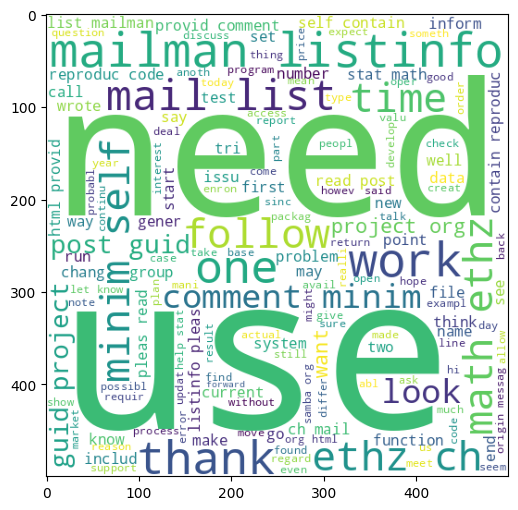

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

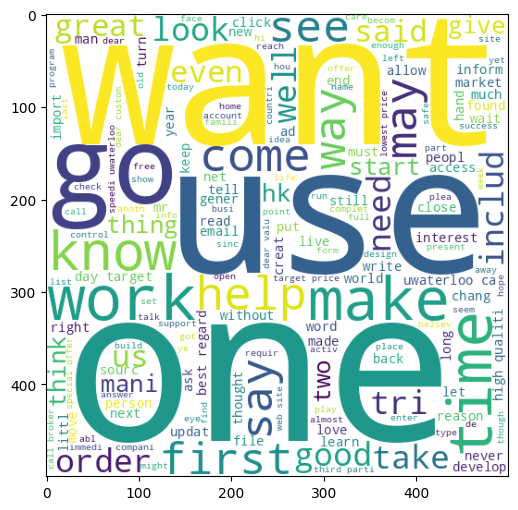

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

448380

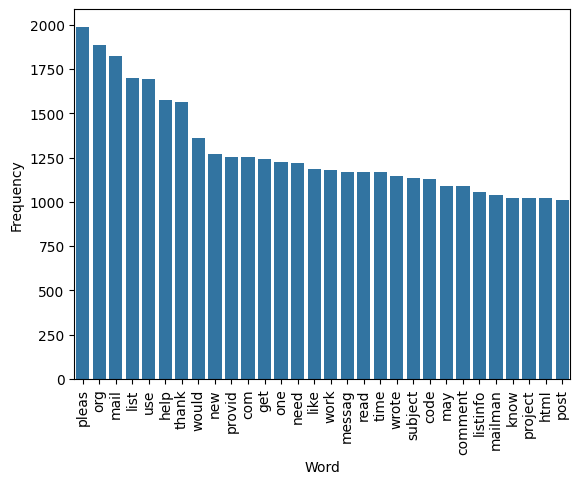

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

401173

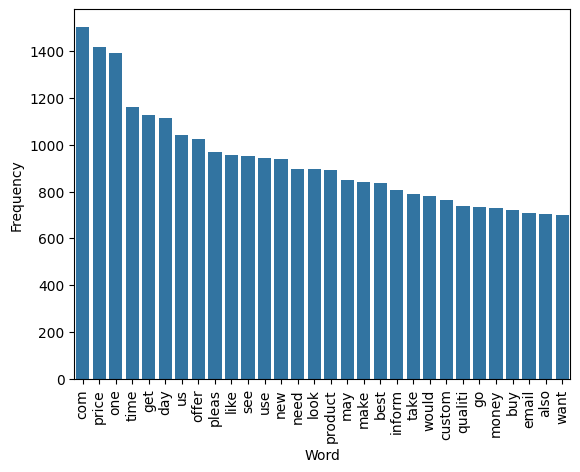

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['processed_length'] = df['transformed_text'].apply(len)

In [ ]:
df.head()

,label,text,length,word_count,sentence_count,transformed_text,processed_length
0,0,into the kingdom of god and those that are ent...,1054,183,1,kingdom god enter lord pardon us thing pray th...,391
1,1,there was flow at hpl meter 1505 on april firs...,235,56,9,flow hpl meter april first deal ticket cover p...,82
2,0,take a look at this one campaign for bvyhprice...,218,30,1,take look one campaign bvyhpric day target pri...,109
3,1,somu wrote actually thats what i was looking f...,847,166,1,somu wrote actual that look user enter string ...,349
4,1,fathi boudra wrote i fixed the issue in the sv...,549,84,1,fathi boudra wrote fix issu svn repo rev dir c...,308


# Intial Model Development

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(9989, 3000)

In [ ]:
y = df['label'].values


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, fbeta_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9259259259259259
[[935 114]
 [ 34 915]]
0.8892128279883382


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9454454454454454
[[985  64]
 [ 45 904]]
0.9338842975206612


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8828828828828829
[[980  69]
 [165 784]]
0.9191090269636577


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
#bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    #'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [ ]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)

    return accuracy, precision, recall, f2

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9644644644644644,
 0.9630801687763713,
 0.9620653319283456,
 0.9622681281618887)

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f2_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall, current_f2 = train_classifier(
        clf, X_train, y_train, X_test, y_test
    )

    print(f"For {name}:")
    print(f"Accuracy  - {current_accuracy}")
    print(f"Precision - {current_precision}")
    print(f"Recall    - {current_recall}")
    print(f"F2 Score  - {current_f2}")
    print()

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f2_scores.append(current_f2)

For SVC:
Accuracy  - 0.9644644644644644
Precision - 0.9630801687763713
Recall    - 0.9620653319283456
F2 Score  - 0.9622681281618887

For KN:
Accuracy  - 0.6191191191191191
Precision - 1.0
Recall    - 0.19810326659641728
F2 Score  - 0.2359437751004016

For NB:
Accuracy  - 0.9454454454454454
Precision - 0.9338842975206612
Recall    - 0.9525816649104321
F2 Score  - 0.9487825356842989

For DT:
Accuracy  - 0.8443443443443444
Precision - 0.9357923497267759
Recall    - 0.7218124341412012
F2 Score  - 0.756404593639576

For LR:
Accuracy  - 0.9619619619619619
Precision - 0.970873786407767
Recall    - 0.9483667017913593
F2 Score  - 0.9527842473004446

For RF:
Accuracy  - 0.9619619619619619
Precision - 0.9609292502639916
Recall    - 0.958904109589041
F2 Score  - 0.9593084545646215

For AdaBoost:
Accuracy  - 0.8543543543543544
Precision - 0.9445945945945946
Recall    - 0.7365648050579557
F2 Score  - 0.7705026455026455

For ETC:
Accuracy  - 0.9584584584584585
Precision - 0.9519832985386222
Recall  

In [ ]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F2 Score': f2_scores
}).sort_values('Recall', ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F2 Score
0,SVC,0.964464,0.963080,0.962065,0.962268
7,ETC,0.958458,0.951983,0.961012,0.959192
5,RF,0.961962,0.960929,0.958904,0.959308
2,NB,0.945445,0.933884,0.952582,0.948783
4,LR,0.961962,0.970874,0.948367,0.952784
9,xgb,0.951451,0.968132,0.928346,0.936039
8,GBDT,0.902402,0.957524,0.831401,0.853896
6,AdaBoost,0.854354,0.944595,0.736565,0.770503
3,DT,0.844344,0.935792,0.721812,0.756405
1,KN,0.619119,1.000000,0.198103,0.235944


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.964464
1,ETC,Accuracy,0.958458
2,RF,Accuracy,0.961962
3,NB,Accuracy,0.945445
4,LR,Accuracy,0.961962
5,xgb,Accuracy,0.951451
6,GBDT,Accuracy,0.902402
7,AdaBoost,Accuracy,0.854354
8,DT,Accuracy,0.844344
9,KN,Accuracy,0.619119


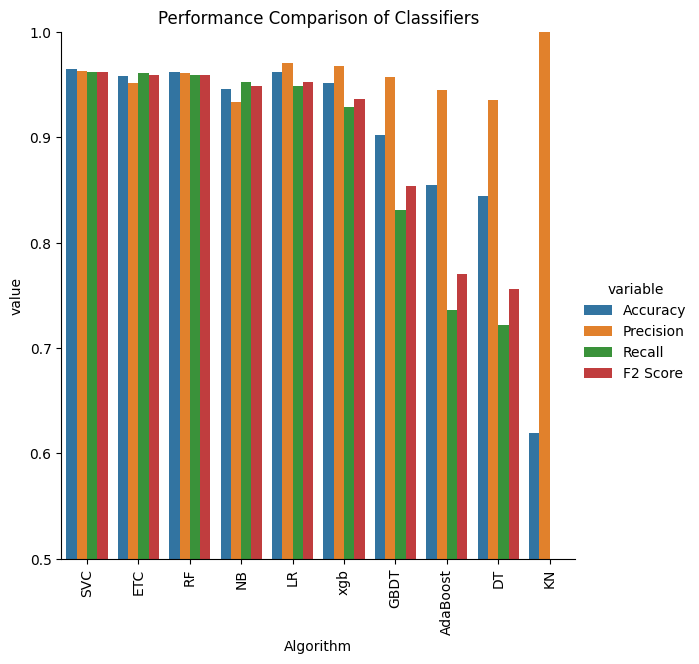

In [ ]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=6)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.title("Performance Comparison of Classifiers")
plt.show()

In [ ]:
for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n", cm)
    print("\n")

Confusion Matrix for SVC:
 [[1014   35]
 [  36  913]]


Confusion Matrix for KN:
 [[1049    0]
 [ 761  188]]


Confusion Matrix for NB:
 [[985  64]
 [ 45 904]]


Confusion Matrix for DT:
 [[1003   46]
 [ 265  684]]


Confusion Matrix for LR:
 [[1022   27]
 [  49  900]]


Confusion Matrix for RF:
 [[1012   37]
 [  39  910]]


Confusion Matrix for AdaBoost:
 [[1008   41]
 [ 250  699]]


Confusion Matrix for ETC:
 [[1003   46]
 [  37  912]]


Confusion Matrix for GBDT:
 [[1014   35]
 [ 160  789]]


Confusion Matrix for xgb:
 [[1020   29]
 [  68  881]]




#Model Optimization

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Recall,F2 Score,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.964464,0.963080,0.962065,0.962268,0.964464,0.963080,0.964464,0.963080,0.964464,0.963080
1,ETC,0.958458,0.951983,0.961012,0.959192,0.958458,0.951983,0.958458,0.951983,0.958458,0.951983
2,RF,0.961962,0.960929,0.958904,0.959308,0.961962,0.960929,0.961962,0.960929,0.961962,0.960929
3,NB,0.945445,0.933884,0.952582,0.948783,0.945445,0.933884,0.945445,0.933884,0.945445,0.933884
4,LR,0.961962,0.970874,0.948367,0.952784,0.961962,0.970874,0.961962,0.970874,0.961962,0.970874
5,xgb,0.951451,0.968132,0.928346,0.936039,0.951451,0.968132,0.951451,0.968132,0.951451,0.968132
6,GBDT,0.902402,0.957524,0.831401,0.853896,0.902402,0.957524,0.902402,0.957524,0.902402,0.957524
7,AdaBoost,0.854354,0.944595,0.736565,0.770503,0.854354,0.944595,0.854354,0.944595,0.854354,0.944595
8,DT,0.844344,0.935792,0.721812,0.756405,0.844344,0.935792,0.844344,0.935792,0.844344,0.935792
9,KN,0.619119,1.000000,0.198103,0.235944,0.619119,1.000000,0.619119,1.000000,0.619119,1.000000


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
rf = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('rf', rf), ('et', etc)], voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix

y_pred = voting.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F2 Score:", fbeta_score(y_test, y_pred, beta=2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.96996996996997
Precision: 0.9683877766069547
Recall: 0.9683877766069547
F2 Score: 0.9683877766069547
Confusion Matrix:
 [[1019   30]
 [  30  919]]


In [ ]:
# from sklearn.model_selection import cross_val_score
# cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Mean cross-validation score:", cross_val_scores.mean())

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1049
           1       0.97      0.97      0.97       949

    accuracy                           0.97      1998
   macro avg       0.97      0.97      0.97      1998
weighted avg       0.97      0.97      0.97      1998



In [ ]:
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5)

# # Plot the learning curve
# plt.plot(train_sizes, test_scores.mean(axis=1), label="Test score")
# plt.plot(train_sizes, train_scores.mean(axis=1), label="Train score")
# plt.xlabel("Number of training samples")
# plt.ylabel("Score")
# plt.legend()
# plt.title("Learning Curve")
# plt.show()

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('rf', rf), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F2 Score:", fbeta_score(y_test, y_pred, beta=2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9679679679679679
Precision: 0.9682539682539683
Recall: 0.964172813487882
F2 Score: 0.9649862898122759
Confusion Matrix:
 [[1019   30]
 [  34  915]]


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
# from sklearn.model_selection import cross_val_score
# cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Mean cross-validation score:", cross_val_scores.mean())

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1049
           1       0.97      0.96      0.97       949

    accuracy                           0.97      1998
   macro avg       0.97      0.97      0.97      1998
weighted avg       0.97      0.97      0.97      1998



In [ ]:
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt

# train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5)

# # Plot the learning curve
# plt.plot(train_sizes, test_scores.mean(axis=1), label="Test score")
# plt.plot(train_sizes, train_scores.mean(axis=1), label="Train score")
# plt.xlabel("Number of training samples")
# plt.ylabel("Score")
# plt.legend()
# plt.title("Learning Curve")
# plt.show()

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier

with open('vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)

with open('model.pkl', 'rb') as f:
    voting = pickle.load(f)

def predict_message(message):
    message_transformed = tfidf.transform([message])

    message_dense = message_transformed.toarray()

    prediction = voting.predict(message_dense)

    return prediction[0]

message = input("Enter the message to check (spam/ham): ")
prediction = predict_message(message)

if prediction == 1:
    print("This message is SPAM.")
else:
    print("This message is HAM.")

Enter the message to check (spam/ham): af
This message is HAM.


In [ ]:
import pandas as pd

spam_email = df[df['label'] == 1].iloc[0]['text']

ham_email = df[df['label'] == 0].iloc[0]['text']

print("Spam Email Example:")
print(spam_email)

print("\nHam Email Example:")
print(ham_email)


Spam Email Example:
there was flow at hpl meter 1505 on april first that didn ' t have a deal ticket out there . . . .
but now there is a deal ticket out there to cover it . . . . 740374
please link it or whatever you have to do to make it work
thanks
lee

Ham Email Example:
into the kingdom of god and those that are entering in he lord pardon escapenumber us in this thing we pray thee have us excused escapenumbernot therefore o escapenumber believers to look into the grave for to you it the holy ghost and escapenumber therefore being a holy habitation unto forth the words of truth and escapenumber soberness escapenumber but in all probability hath made them mad escapenumber and though escapenumber blessed be god all do that of jesus christ they see the necessity of escapenumber closing with a more than almost christians but is heaven so small a escapenumber trifle in men's esteem as not to be total renovation of the whole man escapenumber by the righteousness of complete though we be 

In [ ]:
predict_message("""have a deal ticket out there.click this link...""")

1

In [ ]:
predict_message("""
into the kingdom of god and those that are entering in he lord pardon""")

0

In [ ]:
predict_message("""Click this link to claim your reward.""")

0